In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

import datetime

import gym
import trading_env

import os
import agent 
from os import __file__

In [2]:
#env = gym.make('trading-v0')
env_trading = gym.make('test_trading-v0')

Loading historical data file


Holder Agent
--------------
To begin a holder agent will run on the month of march 2017, which will provide a reference to compare future agents. The same could also be done with a random agent. A holder agent is equivalent to set the action to 1 at each step (selling 100% of the portfolio's fiat).

In [3]:
date = datetime.datetime(2017, 5, 1, 0, 0)
env_trading.reset(date=date)
rewards = []
portfolio = []
while True:
    action = np.array([1]) #Holding
    s, r, done, _ = env_trading.step(action)
    rewards.append(r)
    portfolio.append(env_trading.portfolio_value)
    if done:
        break

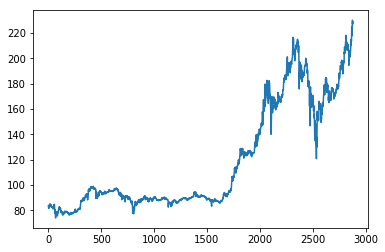

In [4]:
plt.plot(portfolio)
plt.show()

Stochastic Policy Gradient
-----------

In [5]:
agent = agent.StochasticPolicyGradientAgent(env_trading) #Do not run this twice without reseting the Kernel!

In [6]:
#As a sanity check I try to overfit over the same step
#A profitable action in this case would be to buy (action=1)

date = datetime.datetime(2017, 5, 1, 0, 0)
rewards = []
losses = []
env_trading.start_fiat = 100
env_trading.start_crypto = 1

for i in range(1000):
    start = env_trading.reset(date=date)
    action = agent.act([start])
    s, r, done, _ = env_trading.step([action])
    agent.store_step([action], s, r)
    rewards.append(r)
    loss = agent.train()
    losses.append(loss)


Sigma: 1.14945650100708, Mu: -0.05017229914665222, Action: [-0.24174269]
[[ 0.01153041]]


/home/guilherme/Documentos/IA/ml-stock-prediction/agent/continuous_agent.py:111: RuntimeWarning: invalid value encountered in true_divide
  norm_rewards /= np.std(rewards)


Sigma: 1.137378454208374, Mu: -0.07879640907049179, Action: [-0.5382027]
[[ 0.00736711]]
Sigma: 1.126140832901001, Mu: -0.0876113697886467, Action: [ 0.93411463]
[[ 0.04221465]]
Sigma: 1.1147388219833374, Mu: -0.08269447088241577, Action: [-1.]
[[ 0.]]
Sigma: 1.1054832935333252, Mu: -0.07860354334115982, Action: [-0.67184657]
[[ 0.00535692]]
Sigma: 1.0964871644973755, Mu: -0.0671105682849884, Action: [ 1.]
[[ 0.04479388]]
Sigma: 1.0751715898513794, Mu: -0.05073488503694534, Action: [ 1.]
[[ 0.04459555]]
Sigma: 1.0660656690597534, Mu: -0.04427900165319443, Action: [-0.20996508]
[[ 0.01122023]]
Sigma: 1.0563689470291138, Mu: -0.038191165775060654, Action: [ 0.72770375]
[[ 0.03243415]]
Sigma: 1.0462841987609863, Mu: -0.031100105494260788, Action: [ 0.53220505]
[[ 0.02569953]]
Sigma: 1.03450345993042, Mu: -0.017824994400143623, Action: [ 0.93670446]
[[ 0.0406042]]
Sigma: 1.0243756771087646, Mu: -0.01067021768540144, Action: [-0.21284018]
[[ 0.01077828]]
Sigma: 1.0141468048095703, Mu: -0.00

Sigma: 0.4987403154373169, Mu: 0.3875284790992737, Action: [ 1.]
[[ 0.02936752]]
Sigma: 0.49806922674179077, Mu: 0.39658597111701965, Action: [ 0.55984336]
[[ 0.00733082]]
Sigma: 0.49660277366638184, Mu: 0.4027822017669678, Action: [ 0.68505222]
[[ 0.01043655]]
Sigma: 0.4935992658138275, Mu: 0.4090573489665985, Action: [-0.48453495]
[[ 0.01213406]]
Sigma: 0.49118995666503906, Mu: 0.41403472423553467, Action: [ 0.00906032]
[[ 0.00764537]]
Sigma: 0.48984506726264954, Mu: 0.4179348051548004, Action: [ 0.0838148]
[[ 0.00686864]]
Sigma: 0.48824480175971985, Mu: 0.4209308326244354, Action: [-0.69025183]
[[ 0.01088973]]
Sigma: 0.48682013154029846, Mu: 0.4231458902359009, Action: [ 0.4459852]
[[ 0.00520868]]
Sigma: 0.4852057099342346, Mu: 0.4252232611179352, Action: [ 1.]
[[ 0.02681534]]
Sigma: 0.484180748462677, Mu: 0.43215522170066833, Action: [ 0.61368883]
[[ 0.00733928]]
Sigma: 0.48244184255599976, Mu: 0.4357881247997284, Action: [ 0.03379717]
[[ 0.00770442]]
Sigma: 0.48065993189811707, Mu

Sigma: 0.33811408281326294, Mu: 0.5124393701553345, Action: [ 0.1695902]
[[ 0.00582735]]
Sigma: 0.33727216720581055, Mu: 0.5127907395362854, Action: [ 0.19088402]
[[ 0.00501024]]
Sigma: 0.336458295583725, Mu: 0.5123926997184753, Action: [-0.08784145]
[[ 0.01659114]]
Sigma: 0.3362480700016022, Mu: 0.5110518932342529, Action: [ 0.48973387]
[[-0.00271485]]
Sigma: 0.33559510111808777, Mu: 0.5097713470458984, Action: [ 0.21097875]
[[ 0.00407178]]
Sigma: 0.3349100947380066, Mu: 0.5079268217086792, Action: [ 1.]
[[ 0.0257635]]
Sigma: 0.3349222242832184, Mu: 0.5082679986953735, Action: [ 0.16353488]
[[ 0.00584132]]
Sigma: 0.3349267244338989, Mu: 0.5078296065330505, Action: [ 0.22907883]
[[ 0.0032936]]
Sigma: 0.33479782938957214, Mu: 0.506790041923523, Action: [ 0.49338394]
[[-0.00285915]]
Sigma: 0.33421942591667175, Mu: 0.5058072209358215, Action: [ 0.09763137]
[[ 0.00841758]]
Sigma: 0.33382028341293335, Mu: 0.5040889382362366, Action: [ 0.53787231]
[[-0.0029521]]
Sigma: 0.33299028873443604, M

Sigma: 0.286679744720459, Mu: 0.5894981026649475, Action: [ 0.67925644]
[[-0.00621537]]
Sigma: 0.28497064113616943, Mu: 0.5894710421562195, Action: [ 1.]
[[ 0.0202477]]
Sigma: 0.28297072649002075, Mu: 0.5909271836280823, Action: [ 0.46651119]
[[-0.00464154]]
Sigma: 0.281414657831192, Mu: 0.5919191837310791, Action: [ 1.]
[[ 0.02010578]]
Sigma: 0.28073999285697937, Mu: 0.594261109828949, Action: [ 1.]
[[ 0.01979101]]
Sigma: 0.28055649995803833, Mu: 0.5977579951286316, Action: [ 0.19971192]
[[ 0.01053456]]
Sigma: 0.28061163425445557, Mu: 0.6001076102256775, Action: [ 0.06716555]
[[ 0.0200788]]
Sigma: 0.28117361664772034, Mu: 0.6015457510948181, Action: [ 0.33321843]
[[ 0.00217301]]
Sigma: 0.2816397547721863, Mu: 0.6035585999488831, Action: [ 0.32309917]
[[ 0.00281191]]
Sigma: 0.28203821182250977, Mu: 0.6030298471450806, Action: [ 0.51682973]
[[-0.00590099]]
Sigma: 0.28209564089775085, Mu: 0.6018158197402954, Action: [ 0.40046754]
[[-0.00142933]]
Sigma: 0.2819894552230835, Mu: 0.600624978

Sigma: 0.19745668768882751, Mu: 0.653009295463562, Action: [ 0.488877]
[[-0.00926316]]
Sigma: 0.1965726763010025, Mu: 0.65446937084198, Action: [ 0.6136924]
[[-0.01636472]]
Sigma: 0.19556009769439697, Mu: 0.6556910872459412, Action: [ 0.56086141]
[[-0.01432803]]
Sigma: 0.19447118043899536, Mu: 0.6564874053001404, Action: [ 0.42657983]
[[-0.00266345]]
Sigma: 0.19352491199970245, Mu: 0.6564430594444275, Action: [ 0.29963645]
[[ 0.0144868]]
Sigma: 0.19302211701869965, Mu: 0.6553093194961548, Action: [ 0.46547353]
[[-0.00702733]]
Sigma: 0.19252459704875946, Mu: 0.6536431908607483, Action: [ 0.73790801]
[[-0.01491152]]
Sigma: 0.1912330538034439, Mu: 0.6526151895523071, Action: [ 0.46536759]
[[-0.00735848]]
Sigma: 0.19055326282978058, Mu: 0.6508553624153137, Action: [ 0.7361536]
[[-0.01492458]]
Sigma: 0.18984195590019226, Mu: 0.649777352809906, Action: [ 0.57233042]
[[-0.01575843]]
Sigma: 0.18901321291923523, Mu: 0.648694634437561, Action: [ 0.69361478]
[[-0.0169851]]
Sigma: 0.18806949257850

Sigma: 0.14006207883358002, Mu: 0.7510694265365601, Action: [ 0.79080248]
[[-0.02546927]]
Sigma: 0.13945235311985016, Mu: 0.7515223026275635, Action: [ 0.64558065]
[[-0.02021373]]
Sigma: 0.13882489502429962, Mu: 0.7515767216682434, Action: [ 0.87666321]
[[-0.01525966]]
Sigma: 0.13826090097427368, Mu: 0.7522661685943604, Action: [ 0.84529698]
[[-0.02057993]]
Sigma: 0.13769325613975525, Mu: 0.7533693313598633, Action: [ 0.96933687]
[[ 0.00938927]]
Sigma: 0.1374683827161789, Mu: 0.7554384469985962, Action: [ 0.52129805]
[[ 0.00398743]]
Sigma: 0.1374431997537613, Mu: 0.7565150856971741, Action: [ 0.96828258]
[[ 0.00780619]]
Sigma: 0.13768194615840912, Mu: 0.7584983110427856, Action: [ 0.58486718]
[[-0.00933139]]
Sigma: 0.13793450593948364, Mu: 0.7597101926803589, Action: [ 0.73464388]
[[-0.02687447]]
Sigma: 0.13802215456962585, Mu: 0.7607554793357849, Action: [ 0.74130613]
[[-0.0270317]]
Sigma: 0.13796007633209229, Mu: 0.7616726160049438, Action: [ 0.86841685]
[[-0.01896426]]
Sigma: 0.1378

Sigma: 0.1200619786977768, Mu: 0.8034135103225708, Action: [ 0.78021014]
[[-0.03134781]]
Sigma: 0.12014313042163849, Mu: 0.8045138120651245, Action: [ 0.57832503]
[[ 0.00914143]]
Sigma: 0.12043097615242004, Mu: 0.8048990964889526, Action: [ 0.93736541]
[[-0.01488302]]
Sigma: 0.12073454260826111, Mu: 0.8057287335395813, Action: [ 0.76464975]
[[-0.03016144]]
Sigma: 0.12090224772691727, Mu: 0.806376576423645, Action: [ 0.84662098]
[[-0.03038613]]
Sigma: 0.12095284461975098, Mu: 0.80711430311203, Action: [ 0.6253199]
[[-0.00451954]]
Sigma: 0.12110020965337753, Mu: 0.8073047995567322, Action: [ 0.88297027]
[[-0.02659385]]
Sigma: 0.12116839736700058, Mu: 0.8077460527420044, Action: [ 0.70408863]
[[-0.02225603]]
Sigma: 0.12118509411811829, Mu: 0.8078731894493103, Action: [ 0.8350665]
[[-0.03114939]]
Sigma: 0.12109105288982391, Mu: 0.8080990314483643, Action: [ 0.54919982]
[[ 0.02023836]]
Sigma: 0.12131321430206299, Mu: 0.8076668381690979, Action: [ 0.60815209]
[[ 0.00051791]]
Sigma: 0.1216554

Sigma: 0.12799327075481415, Mu: 0.8274053335189819, Action: [ 0.73116243]
[[-0.02357715]]
Sigma: 0.12804648280143738, Mu: 0.8286210298538208, Action: [ 0.75982165]
[[-0.02698138]]
Sigma: 0.12800954282283783, Mu: 0.8295957446098328, Action: [ 0.84490764]
[[-0.03045988]]
Sigma: 0.12787096202373505, Mu: 0.8305261135101318, Action: [ 0.9186514]
[[-0.02388405]]
Sigma: 0.12769971787929535, Mu: 0.8315747976303101, Action: [ 0.78379792]
[[-0.02896107]]
Sigma: 0.12744823098182678, Mu: 0.8324427008628845, Action: [ 0.94388807]
[[-0.01977691]]
Sigma: 0.12721140682697296, Mu: 0.8334845900535583, Action: [ 0.88037235]
[[-0.02904906]]
Sigma: 0.12690980732440948, Mu: 0.8345369100570679, Action: [ 0.91187203]
[[-0.02578551]]
Sigma: 0.1265789270401001, Mu: 0.8356624841690063, Action: [ 0.51792133]
[[ 0.03844041]]
Sigma: 0.1266942322254181, Mu: 0.8361778855323792, Action: [ 0.87412626]
[[-0.02990448]]
Sigma: 0.1267044097185135, Mu: 0.836738109588623, Action: [ 0.91583925]
[[-0.02566306]]
Sigma: 0.126656

Sigma: 0.11814697831869125, Mu: 0.8229564428329468, Action: [ 0.75736433]
[[-0.02903073]]
Sigma: 0.11783876270055771, Mu: 0.8221569657325745, Action: [ 0.80821055]
[[-0.03261855]]
Sigma: 0.11746729165315628, Mu: 0.8214253783226013, Action: [ 0.86310655]
[[-0.03079363]]
Sigma: 0.11705746501684189, Mu: 0.8202758431434631, Action: [ 0.7870639]
[[-0.03199755]]
Sigma: 0.11655401438474655, Mu: 0.8167808055877686, Action: [ 0.738159]
[[-0.02716022]]
Sigma: 0.116063192486763, Mu: 0.8159805536270142, Action: [ 0.85448098]
[[-0.03159142]]
Sigma: 0.1155632734298706, Mu: 0.8155273795127869, Action: [ 0.7918759]
[[-0.03264988]]
Sigma: 0.11502538621425629, Mu: 0.814961850643158, Action: [ 0.74453163]
[[-0.02851606]]
Sigma: 0.11447883397340775, Mu: 0.8135406970977783, Action: [ 0.87720472]
[[-0.02923183]]
Sigma: 0.11392971873283386, Mu: 0.8131554126739502, Action: [ 0.66093057]
[[-0.01167217]]
Sigma: 0.11333300173282623, Mu: 0.8124438524246216, Action: [ 0.79968745]
[[-0.03348722]]
Sigma: 0.112748108

Sigma: 0.09020312875509262, Mu: 0.8593142628669739, Action: [ 0.92696553]
[[-0.03276565]]
Sigma: 0.09009820222854614, Mu: 0.8602172136306763, Action: [ 0.83594906]
[[-0.04007744]]
Sigma: 0.08993678539991379, Mu: 0.8609824776649475, Action: [ 0.75950468]
[[-0.02489625]]
Sigma: 0.08979497104883194, Mu: 0.8614326119422913, Action: [ 0.60168564]
[[ 0.05530785]]
Sigma: 0.09005365520715714, Mu: 0.8612701892852783, Action: [ 0.95053148]
[[-0.02675381]]
Sigma: 0.0902966633439064, Mu: 0.8613936305046082, Action: [ 0.79256624]
[[-0.03345066]]
Sigma: 0.09047934412956238, Mu: 0.8613516688346863, Action: [ 0.88924587]
[[-0.03955313]]
Sigma: 0.0905846580862999, Mu: 0.8614083528518677, Action: [ 0.98595965]
[[-0.01296424]]
Sigma: 0.09075891971588135, Mu: 0.8618276715278625, Action: [ 1.]
[[-0.0064183]]
Sigma: 0.09102867543697357, Mu: 0.8626724481582642, Action: [ 0.94662952]
[[-0.02850525]]
Sigma: 0.09127122908830643, Mu: 0.8643463253974915, Action: [ 0.97292352]
[[-0.01982578]]
Sigma: 0.091533973813

Sigma: 0.07839835435152054, Mu: 0.8990069627761841, Action: [ 0.83919573]
[[-0.03788048]]
Sigma: 0.07835860550403595, Mu: 0.8991409540176392, Action: [ 0.8027159]
[[-0.02569099]]
Sigma: 0.07834041118621826, Mu: 0.8991034030914307, Action: [ 0.97003287]
[[-0.03438773]]
Sigma: 0.07831846922636032, Mu: 0.8992147445678711, Action: [ 0.892829]
[[-0.04584433]]
Sigma: 0.07823982834815979, Mu: 0.8993123769760132, Action: [ 0.96268785]
[[-0.03681232]]
Sigma: 0.07815307378768921, Mu: 0.8995298147201538, Action: [ 0.92979676]
[[-0.04404536]]
Sigma: 0.07802684605121613, Mu: 0.8997905850410461, Action: [ 0.80558324]
[[-0.02651896]]
Sigma: 0.07792820036411285, Mu: 0.8998711109161377, Action: [ 0.81724262]
[[-0.03088276]]
Sigma: 0.07783732563257217, Mu: 0.8998085260391235, Action: [ 0.7522788]
[[ 0.00014281]]
Sigma: 0.07787623256444931, Mu: 0.899513840675354, Action: [ 0.92181146]
[[-0.0450787]]
Sigma: 0.07785890996456146, Mu: 0.8992987275123596, Action: [ 0.93146425]
[[-0.04385355]]
Sigma: 0.0777967

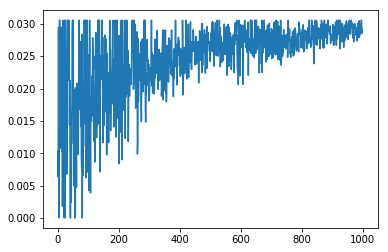

In [7]:
#Mu tends to 1 and variance to 0
plt.plot(rewards)
plt.show()